# Test Script for Data Read-In

In [42]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from matplotlib import pyplot as plt
import plotly.express as px

# Load in Data

In [9]:
# Load calendar data
calendar = pd.read_csv("../data/raw/calendar.csv")

# Load reviews data
review_map = pd.read_csv("../data/raw/reviews_ids.csv")
reviews = pd.read_csv("../data/raw/reviews.csv")

# Load listings data
listings_map = pd.read_csv("../data/raw/listings_ids.csv")
listings = pd.read_csv("../data/raw/listings.csv")

# Load neighborhoods
neighborhoods = pd.read_csv("../data/raw/neighbourhoods.csv")

# EDA

## Calendar

In [62]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,130805,2021-04-08,f,97.0,97.0,30.0,90.0
1,12042,2021-04-08,t,65.0,65.0,32.0,90.0
2,958,2021-04-10,f,150.0,150.0,2.0,1125.0
3,958,2021-04-11,f,150.0,150.0,2.0,1125.0
4,958,2021-04-12,t,151.0,151.0,2.0,1125.0


In [15]:
# Remove dollar signs
calendar[calendar.columns[3]] = calendar[calendar.columns[3]].replace('[\$,]', '', regex=True).astype(float)
calendar[calendar.columns[4]] = calendar[calendar.columns[4]].replace('[\$,]', '', regex=True).astype(float)

In [16]:
# Convert date string to date object
calendar['date'] = pd.to_datetime(calendar.date)

In [17]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438590 entries, 0 to 2438589
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 130.2+ MB


In [18]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,2.438590e+06,2.438419e+06,2.438419e+06,2.438564e+06,2.438564e+06
mean,2.534062e+07,2.353643e+02,2.351831e+02,3.811021e+01,6.757814e+06
std,1.537255e+07,7.305634e+02,7.305240e+02,1.159814e+02,1.202710e+08
min,9.580000e+02,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00
25%,1.143733e+07,9.100000e+01,9.100000e+01,2.000000e+00,9.000000e+01
50%,2.633494e+07,1.450000e+02,1.450000e+02,3.000000e+01,1.125000e+03
75%,3.941002e+07,2.300000e+02,2.300000e+02,3.000000e+01,1.125000e+03
max,4.908214e+07,2.500000e+04,2.500000e+04,1.125000e+03,2.147484e+09


In [63]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,130805,2021-04-08,f,97.0,97.0,30.0,90.0
1,12042,2021-04-08,t,65.0,65.0,32.0,90.0
2,958,2021-04-10,f,150.0,150.0,2.0,1125.0
3,958,2021-04-11,f,150.0,150.0,2.0,1125.0
4,958,2021-04-12,t,151.0,151.0,2.0,1125.0


In [68]:
calendar_distinct = calendar[['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']]

## Reviews

In [19]:
review_map.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [20]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [60]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279937 entries, 0 to 279936
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     279937 non-null  int64         
 1   id             279937 non-null  int64         
 2   date           279937 non-null  datetime64[ns]
 3   reviewer_id    279937 non-null  int64         
 4   reviewer_name  279937 non-null  object        
 5   comments       279937 non-null  object        
 6   nchar_review   279937 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.0+ MB


In [61]:
reviews.describe()

,listing_id,id,reviewer_id,nchar_review
count,2.799370e+05,2.799370e+05,2.799370e+05,279937.000000
mean,1.154140e+07,3.006876e+08,7.337489e+07,276.435419
std,1.111166e+07,2.147125e+08,8.097727e+07,261.698069
min,9.580000e+02,1.981000e+03,1.000000e+00,0.000000
25%,2.046634e+06,1.072390e+08,1.292049e+07,104.000000
50%,7.701360e+06,2.662615e+08,4.142408e+07,208.000000
75%,1.858728e+07,4.859294e+08,1.099941e+08,364.000000
max,4.890715e+07,7.471394e+08,3.947581e+08,4640.000000


In [21]:
# Change format of date
reviews['date'] = pd.to_datetime(reviews.date)

In [43]:
# Replace NANs
reviews['comments'].replace(to_replace=np.nan, value="", inplace=True)

In [45]:
# Get length of comments
review_lens = [len(reviews.comments.values[i]) for i in range(len(reviews))]
reviews['nchar_review'] = review_lens

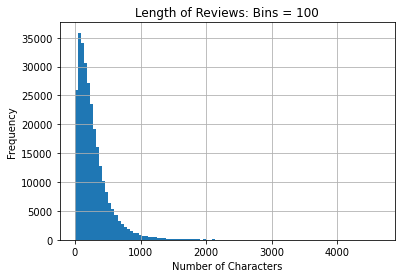

In [51]:
# Investigate reviews
review_bins = 100
reviews.nchar_review.hist(bins=review_bins)
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.title("Length of Reviews: Bins = " + str(review_bins));

In [53]:
# Number of unique reviewers
print(f"Number of Unique Reviewers: {len(set(reviews.reviewer_id))}")

Number of Unique Reviewers: 254664


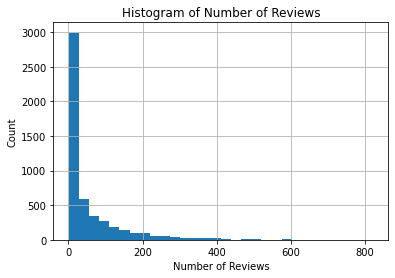

In [58]:
# Plot the number of reviews per listing
reviews.listing_id.value_counts().hist(bins=30)
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.title("Histogram of Number of Reviews");

#### Notes:
1. Number of characters in reviews tend to follow a Poisson distribution centered around 100.
2. The number of unique reviewers is 254664, while the number of total reviewers is 279937.
3. The number of reviews per listing is similar to an exponential distribution that falls off rapidly.  Some properties with over 800 reviews.

#### Feature Engineering Ideas:
1. Sentiment analysis for a "positive", "negative", "neutral" label.
2. Number of reviews per listing.  More reviewed listings could be more valuable.
3. Clustering of words in reviews to identify subgroups of reviews.

## Listings

In [73]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20210407173733,2021-04-10,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,100%,91%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, California, United States",Western Addition,NaN,37.77028,-122.43317,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Keypad"", ""Backyard"", ""Hot water"", ""Long term...",$150.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,4,6,10,112,2021-04-10,277,36,1,2009-07-23,2021-04-05,97.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.94
1,5858,https://www.airbnb.com/rooms/5858,20210407173733,2021-04-08,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"San Francisco, California, United States",Bernal Heights,NaN,37.74474,-122.42089,Entire apartment,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Hangers"", ""Long term stays allowed"", ""Washer...",$195.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,30,60,90,365,2021-04-08,111,0,0,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.76
2,7918,https://www.airbnb.com/rooms/7918,20210407173733,2021-04-08,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, California, United States",Haight Ashbury,NaN,37.76555,-122.45213,Private room in apartment,Private room,2,NaN,4 shared baths,1.0,1.0,"[""Hangers"", ""Long term stays allowed"", ""Washer...",$56.00,32,60,32.0,32.0,60.0,60.0,32.0,60.0,NaN,t,30,60,90,365,2021-04-08,19,0,0,2009-08-31,2020-03-06,84.0,7.0,8.0,9.0,9.0,9.0,8.0,NaN,f,8,0,8,0,0.13
3,8142,https://www.airbnb.com/rooms/8142,202

In [70]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.682000e+03,6.682000e+03,6.682000e+03,6341.000000,6341.000000,0.0,6682.000000,6682.000000,6682.000000,0.0,5800.000000,6634.000000,6682.000000,6682.000000,6681.000000,6681.000000,6.681000e+03,6.681000e+03,6681.000000,6.681000e+03,0.0,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,4972.000000,4947.000000,4947.000000,4946.000000,4948.000000,4946.000000,4946.000000,6682.000000,6682.000000,6682.000000,6682.000000,5010.000000
mean,2.534412e+07,2.021041e+13,7.850733e+07,75.058035,75.058035,NaN,37.768508,-122.428914,3.067794,NaN,1.497414,1.709677,20.178240,518.621969,21.148481,38.824278,2.893587e+06,7.715061e+06,38.106765,6.764583e+06,NaN,10.940287,25.212960,41.409458,160.310386,41.894193,3.261748,0.350195,95.224658,9.728724,9.589650,9.826122,9.774859,9.697938,9.364941,16.369650,12.157887,3.413649,0.618228,1.174543
std,1.537523e+07,0.000000e+00,1.024033e+08,296.956314,296.956314,NaN,0.022710,0.026676,1.834750,NaN,0.844319,1.203219,32.197366,547.047182,41.508160,117.920768,7.877167e+07,1.284889e+08,114.641489,1.180007e+08,NaN,12.629187,24.984605,37.070211,138.348438,81.359712,10.440566,1.280841,8.226746,0.791936,0.853265,0.654218,0.772374,0.783645,0.952277,36.306069,35.730193,8.507695,3.745078,1.654019
min,9.580000e+02,2.021041e+13,1.169000e+03,0.000000,0.000000,NaN,37.704250,-122.512460,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.143736e+07,2.021041e+13,4.430421e+06,1.000000,1.000000,NaN,37.753570,-122.441643,2.000000,NaN,1.000000,1.000000,2.000000,30.000000,2.000000,2.000000,9.000000e+01,9.000000e+01,2.000000,9.000000e+01,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2.633495e+07,2.021041e+13,2.408706e+07,2.000000,2.000000,NaN,37.772020,-122.422745,2.000000,NaN,1.000000,1.000000,30.000000,182.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,4.000000,19.000000,37.000000,140.500000,6.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.520000
75%,3.941168e+07,2.021041e+13,1.148649e+08,14.000000,14.000000,NaN,37.787260,-122.409780,4.000000,NaN,2.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,27.000000,55.000000,84.000000,302.750000,43.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,0.000000,1.537500
max,4.908214e+07,2.021041e+13,3.956471e+08,2844.000000,2844.000000,NaN,37.809540,-122.368230,16.000000,NaN,9.000000,14.000000,1125.000000,10000.000000,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,821.000000,193.000000,40.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,17

In [71]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6682 non-null   int64  
 1   listing_url                                   6682 non-null   object 
 2   scrape_id                                     6682 non-null   int64  
 3   last_scraped                                  6682 non-null   object 
 4   name                                          6682 non-null   object 
 5   description                                   6609 non-null   object 
 6   neighborhood_overview                         4777 non-null   object 
 7   picture_url                                   6682 non-null   object 
 8   host_id                                       6682 non-null   int64  
 9   host_url                                      6682 non-null   o

#### Notes:
1. name - Name of the listing
2. description - Detailed description of the listing
3. neighborhood_overview - Host's description of the neighbourhood
4. host_id - Airbnb's unique identifier for the host/user
5. host_since - The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest. Could indicate experience.
6. host_about - Description about the host
7. host_response_time - Engagement time on website
8. host_response_rate - Engagement rate on website
9. host_is_superhost - T/F for whether superhost or not
10. host_neighbourhood - Name of host neighborhood
11. host_listings_count - The number of listings the host has (per Airbnb calculations)
12. host_total_listings_count - The number of listings the host has (per Airbnb calculations)
13. host_verifications - Levels of verifications host has gone through
14. host_has_profile_pic - Does the host have a profile picture?
15. neighbourhood_cleansed - The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
16. latitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
17. longitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
18. property_type - Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
19. room_type - "[Entire home/apt|Private room|Shared room|Hotel]
20. accommodates - The maximum capacity of the listing
21. bathrooms - The number of bathrooms in the listing
22. bathrooms_text - "The number of bathrooms in the listing. 
On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used."
23. bedrooms - Number of bedrooms
24. beds - Number of beds
25. amenities - List of amenaties for listing (json object)
26. price - Price (string) for listing
27. minimum_nights - minimum number of night stay for the listing (calendar rules may be different)
28. maximum_nights - maximum number of night stay for the listing (calendar rules may be different)
29. minimum_minimum_nights - the smallest minimum_night value from the calender (looking 365 nights in the future)
30. maximum_minimum_nights - the largest minimum_night value from the calender (looking 365 nights in the future)
31. minimum_maximum_nights - the smallest maximum_night value from the calender (looking 365 nights in the future)
32. maximum_maximum_nights - the largest maximum_night value from the calender (looking 365 nights in the future)
33. minimum_nights_avg_ntm - the average minimum_night value from the calender (looking 365 nights in the future)
34. maximum_nights_avg_ntm - the average maximum_night value from the calender (looking 365 nights in the future)
35. has_availability - Currently has available
36. availability_30 - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
37. availability_60 - Number of nights available in the next 60 days
38. availability_90 - Number of nights available in the next 90 days
39. availability_365 - Number of nights available in the next 365 days
40. number_of_reviews - The number of reviews the listing has
41. number_of_reviews_ltm - The number of reviews the listing has (in the last 12 months)
42. number_of_reviews_l30d - The number of reviews the listing has (in the last 30 days)
43. first_review - Date of first review
44. last_review - Date of last review (Diff between 42 and 43?)
45. review_scores_rating - Score out of 100 for listing
46. review_scores_accuracy - ? out of 10
47. review_scores_cleanliness - Score of cleanliness out of 10
48. review_scores_checkin - ? out of 10
49. review_scores_communication - Score of communication out of 10
50. review_scores_location - Score of location out of 10
51. review_scores_value - Score of value
52. license - The licence/permit/registration number
53. instant_bookable - [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.
54. calculated_host_listings_count - The number of listings the host has in the current scrape, in the city/region geography.
55. calculated_host_listings_count_entire_homes - The number of Entire home/apt listings the host has in the current scrape, in the city/region geography
56. calculated_host_listings_count_private_rooms - The number of Private room listings the host has in the current scrape, in the city/region geography
57. calculated_host_listings_count_shared_rooms - The number of Shared room listings the host has in the current scrape, in the city/region geography
58. reviews_per_month - The number of reviews the listing has over the lifetime of the listing

#### Feature Engineering:
1. Nested lists can be broken out into separate OHE variables.
2. Text variables can be split out into OHE BOW after cleaning.
3. Convert dates from string, take difference between dates to measure experience.
4. Convert text variables like bathroom to numeric

## Neighborhoods